<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [62]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [63]:
# Create dictionary

with open('sat_scores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

d = {}

for n in range(len(data[0])):
    for key in data[0]:
        d[key] = [row[n] for row in data[1::]]

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [64]:
made_df = pd.DataFrame(data)
made_df.dtypes

0    object
1    object
2    object
3    object
dtype: object

In [65]:
df = pd.read_csv('sat_scores.csv')
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [66]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [67]:
data_d = {'Shape': df.shape}
desc = ['State where SAT was taken', 'Participation rate', 'Verbal test scores', 'Math test scores']

data_d.update(dict(zip(list(df.columns), [[x,y] for x,y in zip(list(df.dtypes), desc)])))
data_d

{'Math': [dtype('int64'), 'Math test scores'],
 'Rate': [dtype('int64'), 'Participation rate'],
 'Shape': (52, 4),
 'State': [dtype('O'), 'State where SAT was taken'],
 'Verbal': [dtype('int64'), 'Verbal test scores']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [68]:
# Dropped last row which is 'All'
df.drop(51,inplace=True)
df.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


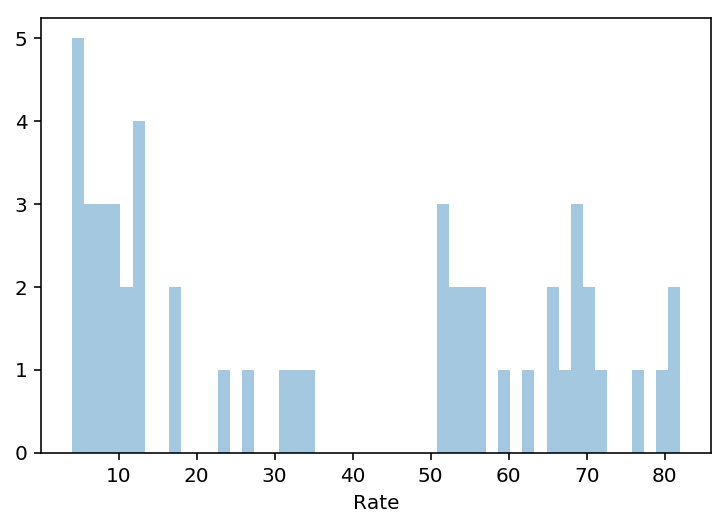

In [69]:
# 'Rate'
sns.distplot(df['Rate'],kde=False, bins=50)

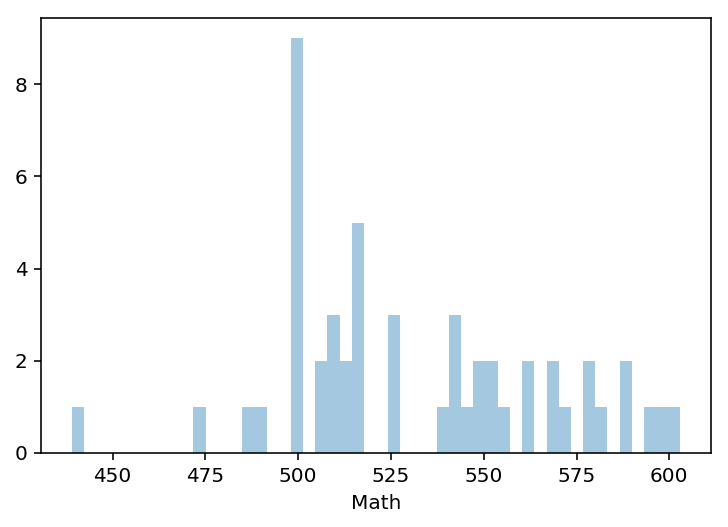

In [70]:
# 'Math'
sns.distplot(df['Math'],kde=False, bins=50)

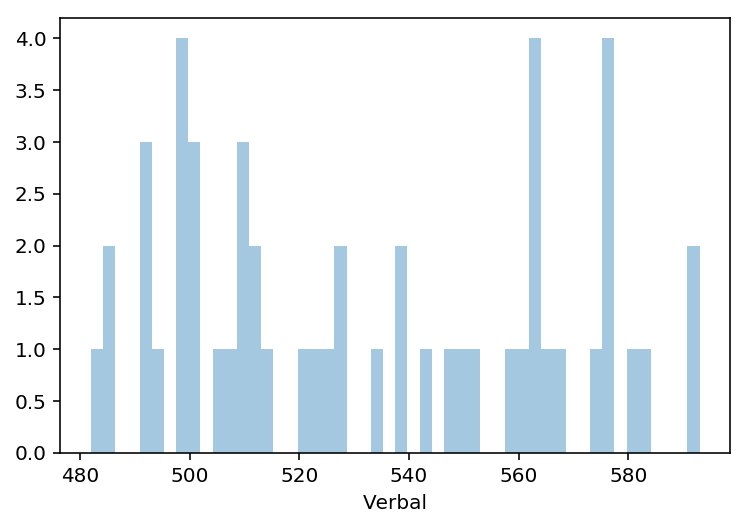

In [71]:
# 'Verbal'
sns.distplot(df['Verbal'],kde=False, bins=50)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

It gives the distribution of each variable, as well as the relationship between each of the variables. 

The rate variable is negatively correlated with both Verbal and Math. Verbal and Math have a linear, positive correlation.

There appears to be a potential outlier in the Math dataset.

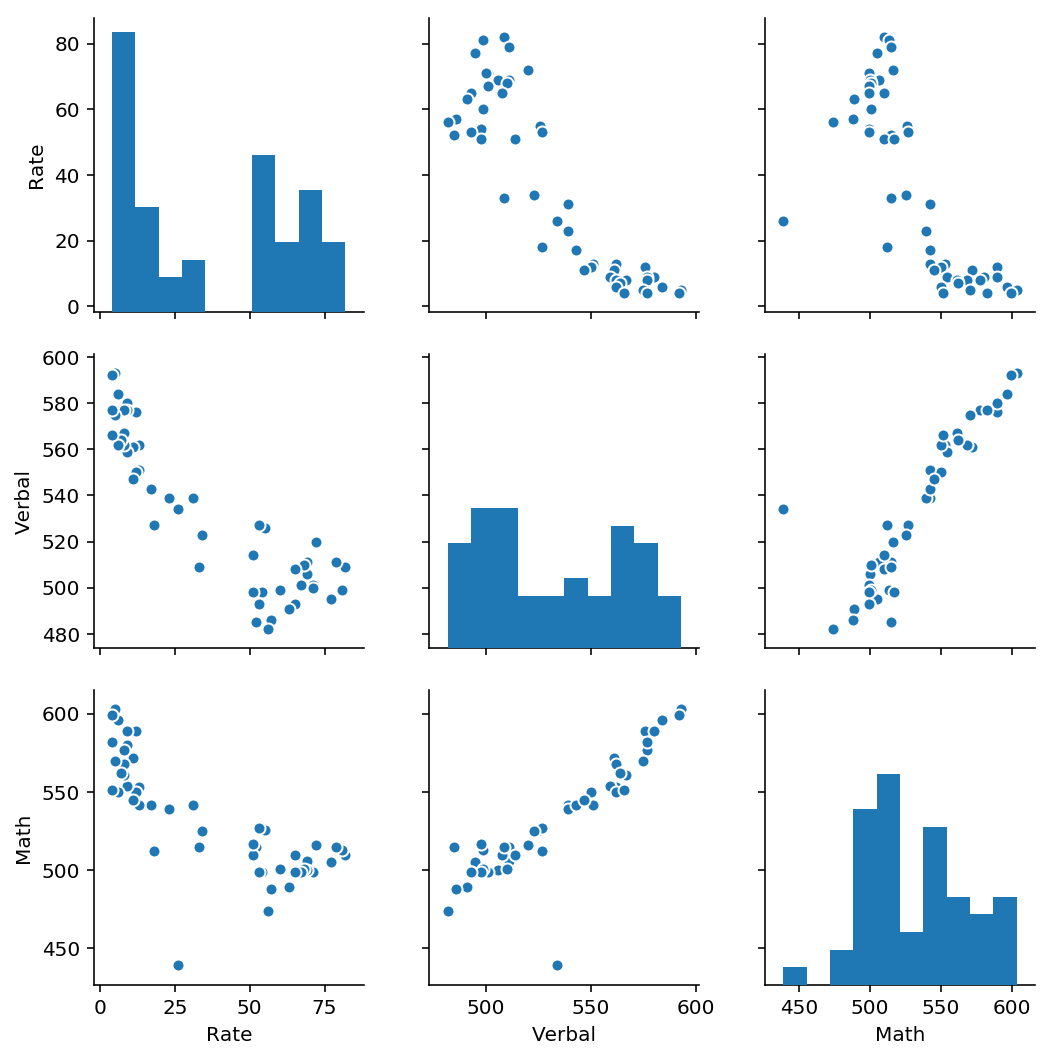

In [72]:
sns.pairplot(df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

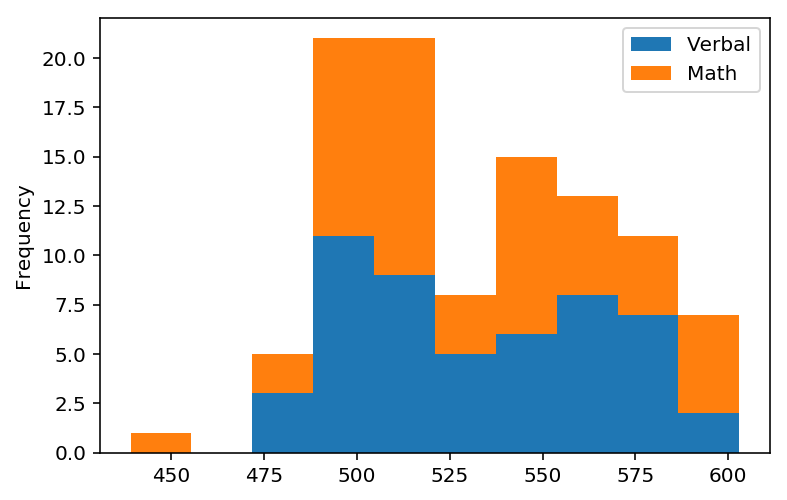

In [73]:
df_vm = df[['Verbal','Math']]
df_vm.plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

__A:__ Able to compare across quartile values and easily spot potential outliers

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

__A:__ They are on different scales

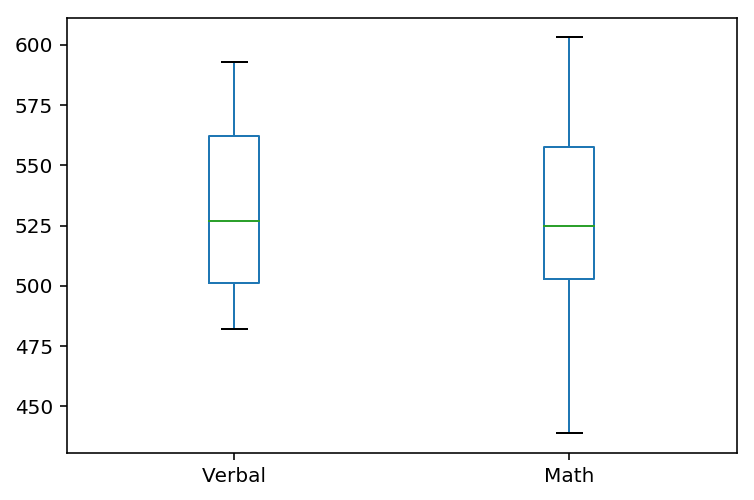

In [74]:
df_vm.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


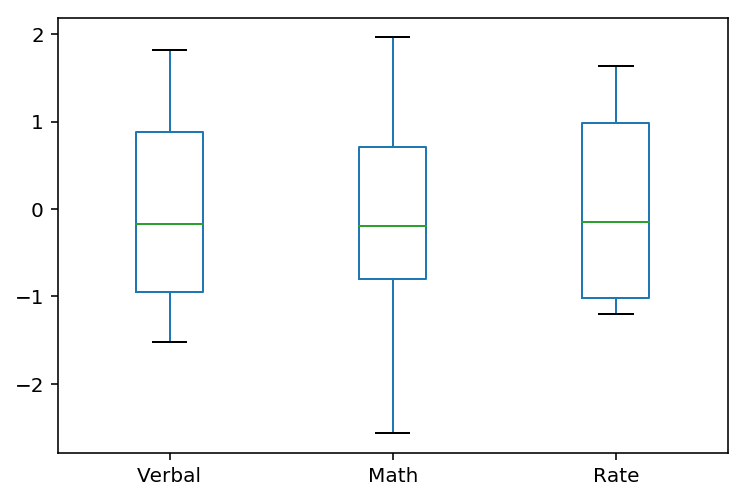

In [75]:
# Normalise the data

def to_normalise(column):
    df_scaled = (df[column] - (df[column].mean()))/df[column].std()
    return df_scaled

df_v_scaled = to_normalise('Verbal')
df_m_scaled = to_normalise('Math')
df_r_scaled = to_normalise('Rate')

df_scaled = pd.concat([df_v_scaled, df_m_scaled, df_r_scaled], axis=1)
df_scaled.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.5+ KB


In [77]:
list_of_states = df[df['Verbal'] > df['Verbal'].mean()]['State']
list_of_states.count()
list_of_states

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

24 are above the mean, out of 51. As around half of the states are above the mean, this means that the distribution is quite balanced.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [78]:
df[df['Verbal'] > df['Verbal'].median()]['State'].count()

24

This is the same, because there is no extremely high or low value that distorts the mean. Hence the median is close to the mean.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [79]:
df['Difference'] = df['Verbal'] - df['Math']
df.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [80]:
df1 = df.sort_values('Difference', ascending=False).head(10)
df2 = df.sort_values('Difference', ascending=True).head(10)

print(df1.head(3))
print(df2.head(3))

   State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15
   State  Rate  Verbal  Math  Difference
21    HI    52     485   515         -30
23    CA    51     498   517         -19
1     NJ    81     499   513         -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [81]:
df.iloc[:, 1:4].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [82]:
df.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


__Count:__ The number of non-NA/null observations in the column

__Mean:__ The mean of the column

__Std:__ The standard deviation of the column

__Min:__ The minimum (lowest value) in the column

__25%:__ The 25th percentile of the column

__50%:__ The 50th percentile of the column

__75%:__ The 75th percentile of the column

__Max:__ The maximum (highest value) in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [83]:
df.cov()

,Rate,Verbal,Math,Difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Difference,-43.06,23.529412,-227.370196,250.899608


__1__
Covariance does not use one standard unit of measurement, but correlation does. Hence covariance can only tell you whether the variables are positively or negatively related, but correlation can tell you the degree to which they move together.

__2__
To convert covariance into correlation, normalise covariance.
Divide covariance of (x,y) by the multiplication of the sample standard deviation of each of the variables (s_x * s_y)

__3__
As rate is on a different scale as verbal and math, using the correlation matrix is more effective to understand the degree to which they move together.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [84]:
# na_values are marked by '-'
data_eda = pd.read_csv('drug-use-by-age.csv', na_values='-')
data_eda.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [85]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [86]:
# age data contains ranges and hence gives dtype object
data_eda['age']

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object

In [87]:
# minimal null values
data_eda.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [88]:
# see all columns
pd.set_option('max_columns', 30)
data_eda.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [89]:
data_eda.describe()

# usage (which is a %) are all < 100, which is fine
# frequency (which is median number of times used over 12 months) are all <365, which is fine
# appears to be many outliers in frequency usage across many drugs

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,73.281250,3.394118,8.411765,1.388235,6.156250,6.270588,14.705882,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,70.090173,2.792506,15.000245,0.927283,4.860448,3.166379,6.935098,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.100000,2.000000,0.000000,2.000000,0.600000,7.000000,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,39.625000,0.600000,3.000000,0.600000,3.375000,3.900000,12.000000,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,53.750000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,71.875000,5.200000,4.000000,2.000000,6.625000,9.000000,15.000000,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [90]:
data_eda.rename(columns={'pain-releiver-frequency':'pain-reliever-frequency'}, inplace=True)
data_eda.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-reliever-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [91]:
# split into dataframe for usage and frequency

use_columns = list(data_eda.columns[::2])
use_columns.insert(1, 'n')
freq_columns = list(data_eda.columns[1::2])
freq_columns.insert(0, 'age')

data_use = data_eda[use_columns]
data_freq = data_eda[freq_columns]

### Final Response

For the development of a policy for drug abuse, we are concerned with the control and regulation of drugs considered dangerous, particularly those which are addictive (high usage/ high frequency).

__Alcohol and Marijuana have the highest usage by far.__

Alcohol is legal, and Marijuana use is legal in some states.

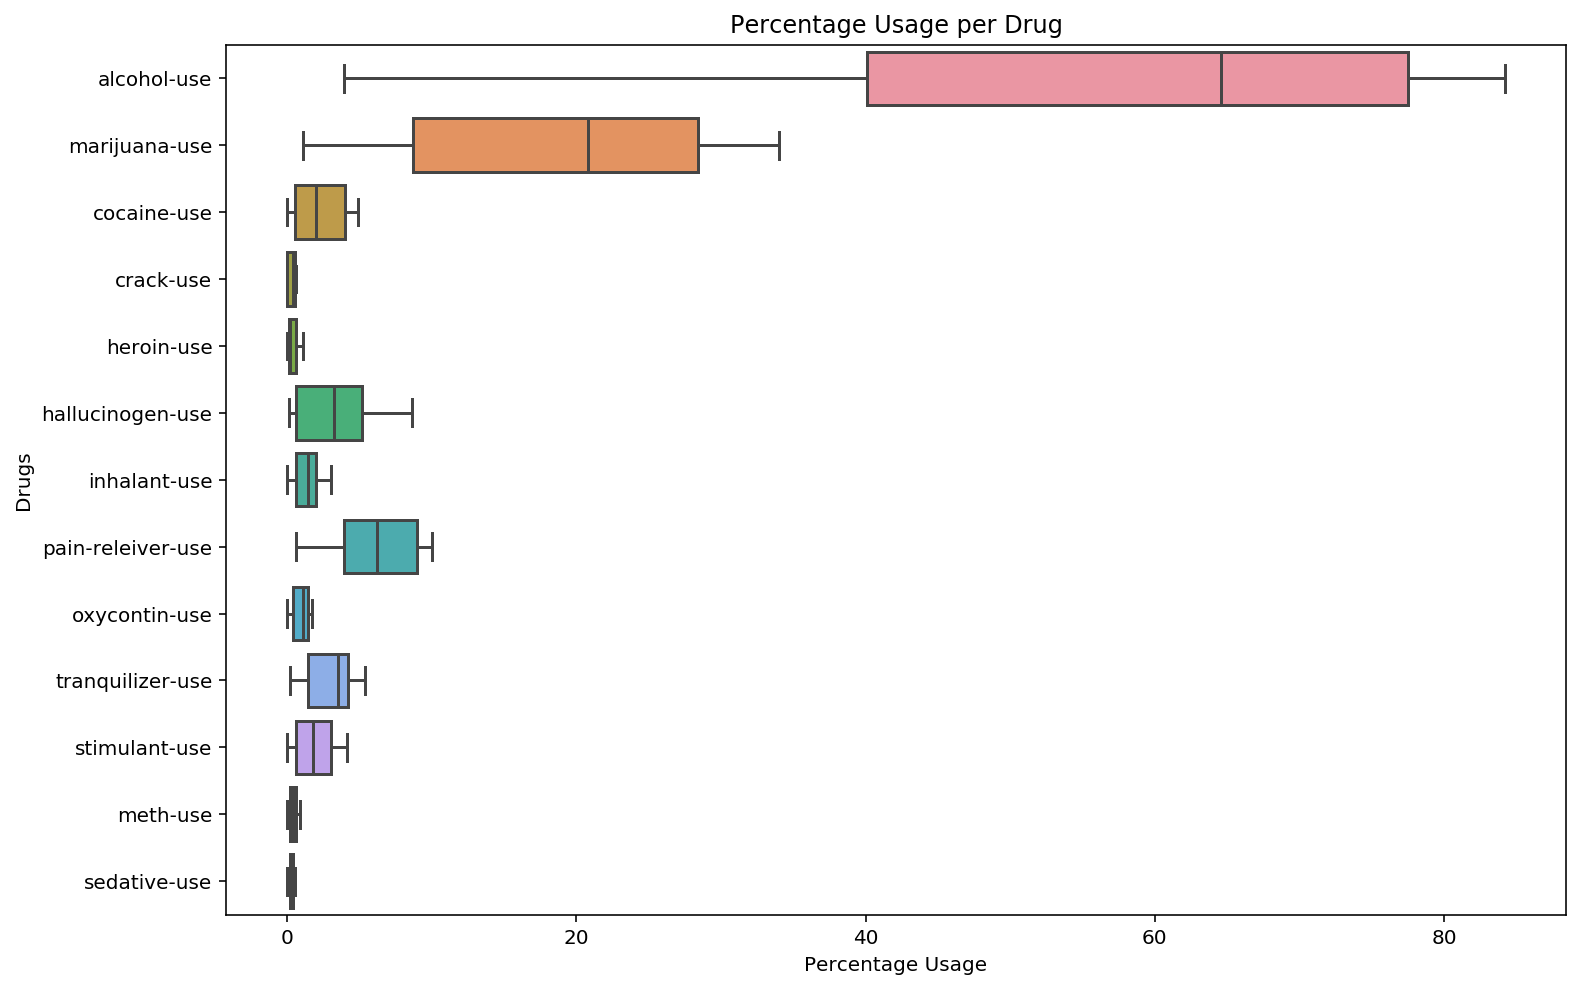

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data_use.iloc[:,2:], orient='h') # not plotting n and age
plt.title('Percentage Usage per Drug')
plt.xlabel('Percentage Usage')
plt.ylabel('Drugs')

__Heroin, Marijuana, Alcohol and Meth have high frequency of use.__

Some outliers can be observed - severe addicts take the drugs at extremely high frequencies.

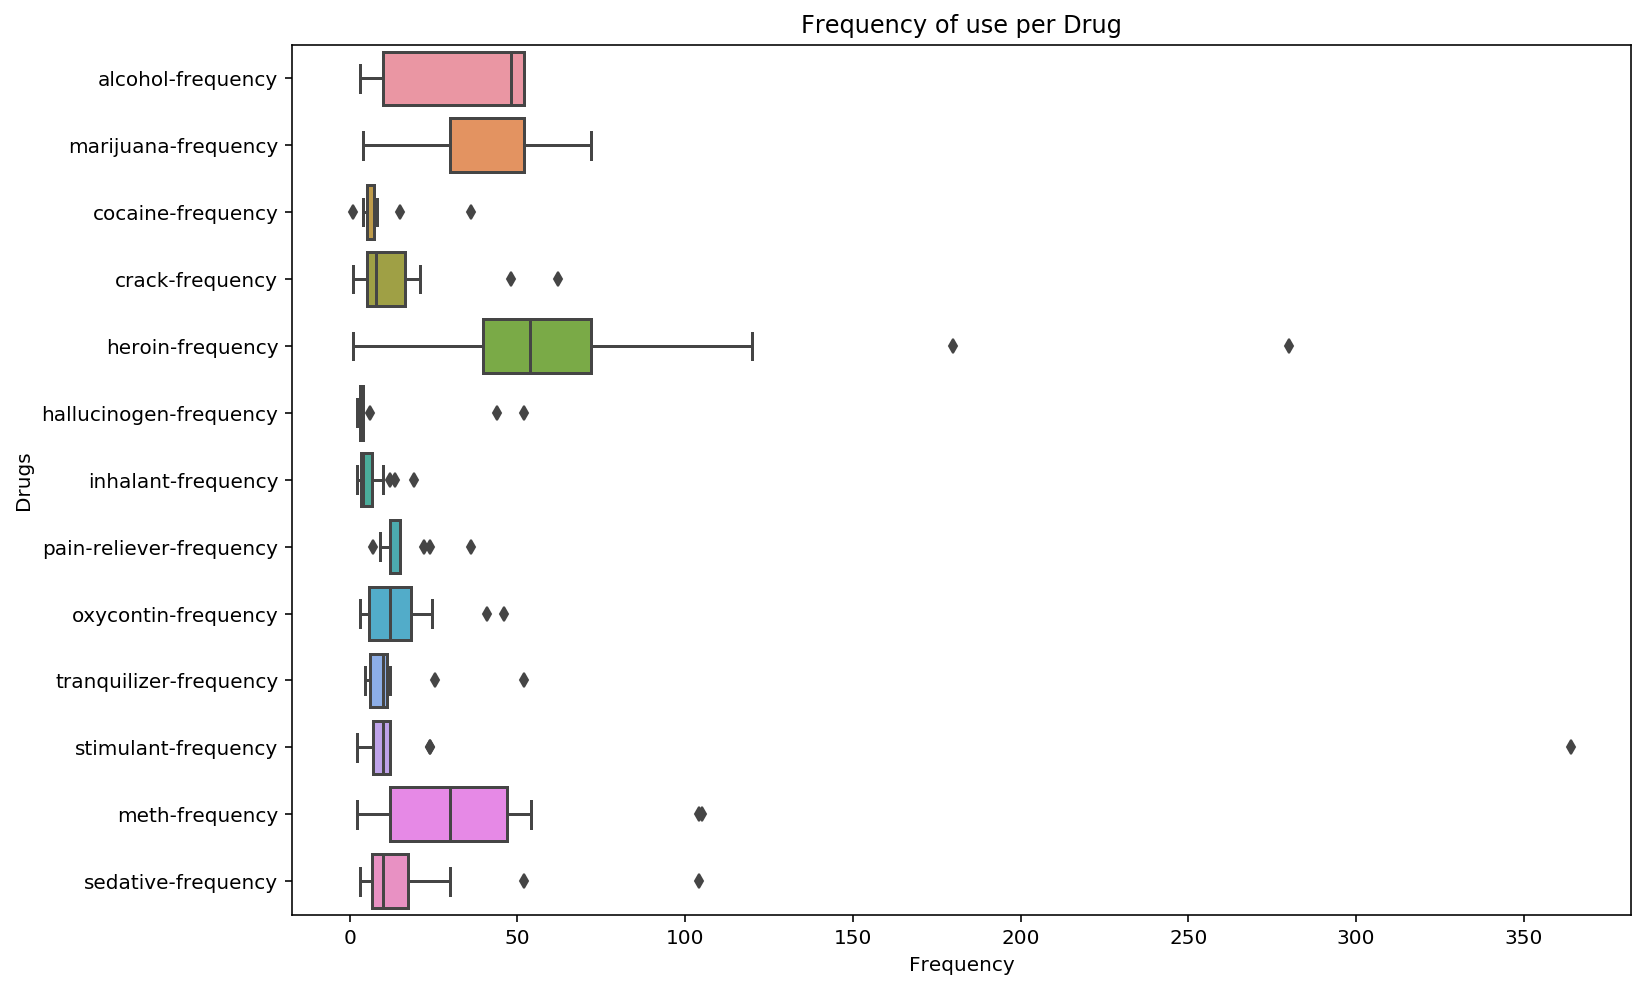

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data_freq.iloc[:,2:], orient='h') # not plotting n and age
plt.title('Frequency of use per Drug')
plt.xlabel('Frequency')
plt.ylabel('Drugs')

Given that the age groups are placed into different sized buckets, it is important to calculate the average age in the bin before plotting.

In [94]:
def avg_age(value):
    if '+' in value:
        return (float(value[:-1]))
    elif '-' in value:
        return ( (float(value[-2:]) + float(value[:2])) / 2 ) 
    else:
        return value

data_eda['avg_age'] = (data_eda['age'].apply(avg_age)).astype(float)
data_use['avg_age'] = (data_use['age'].apply(avg_age)).astype(float)
data_freq['avg_age'] = (data_freq['age'].apply(avg_age)).astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


__Drug usage begins early at around 20 years.__

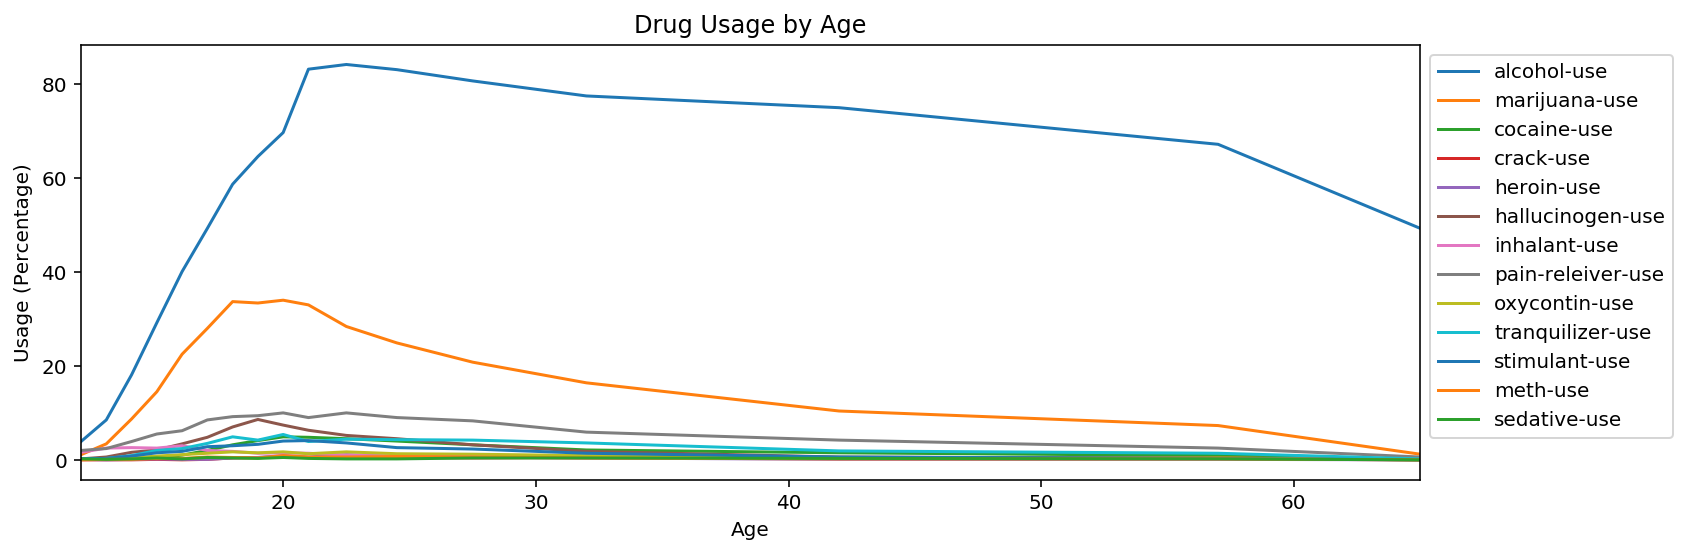

In [95]:
# Set up axes, plot. 
fig, ax = plt.subplots()
data_use.iloc[:,2:].plot(x='avg_age', figsize=(12,4), ax=ax)

# Modify labels and ticks
plt.title('Drug Usage by Age')
plt.xlabel('Age')
plt.ylabel('Usage (Percentage)')
plt.legend(bbox_to_anchor=(1,1))

__Heroin and Marijuana frequency spikes at around 20 and 40. Alcohol frequency spikes after 60.__

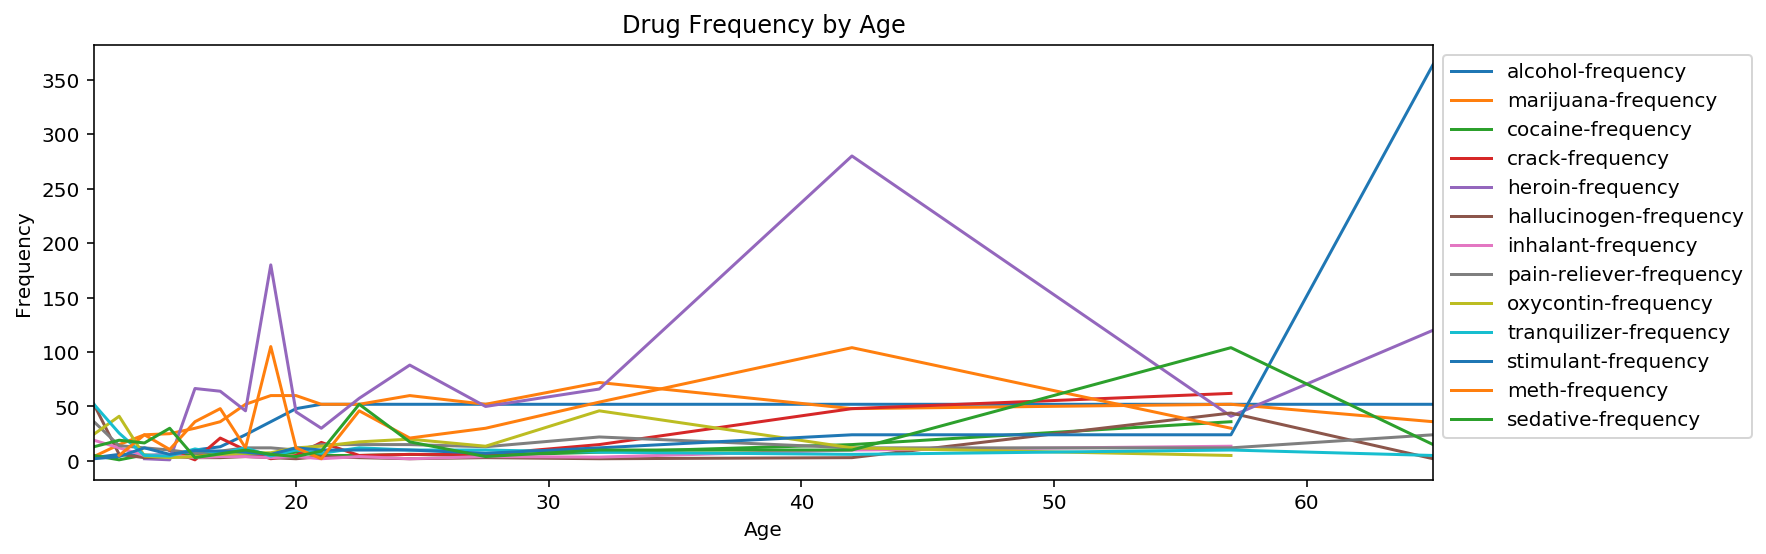

In [96]:
# Set up axes, plot. 
fig, ax = plt.subplots()
data_freq.iloc[:,2:].plot(x='avg_age', figsize=(12,4), ax=ax)

# Modify labels and ticks
plt.title('Drug Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1,1))

__Inhalant use is interestingly negatively correlated across all other drug usage.__

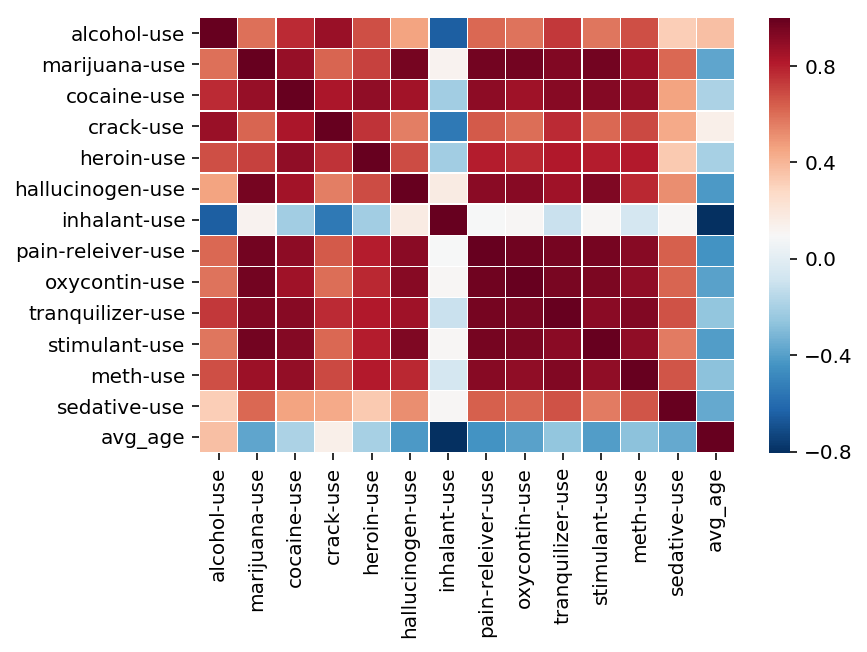

In [97]:
sns.heatmap((data_use.drop('n',axis=1)).corr(), linewidths=0.1, cmap="RdBu_r")

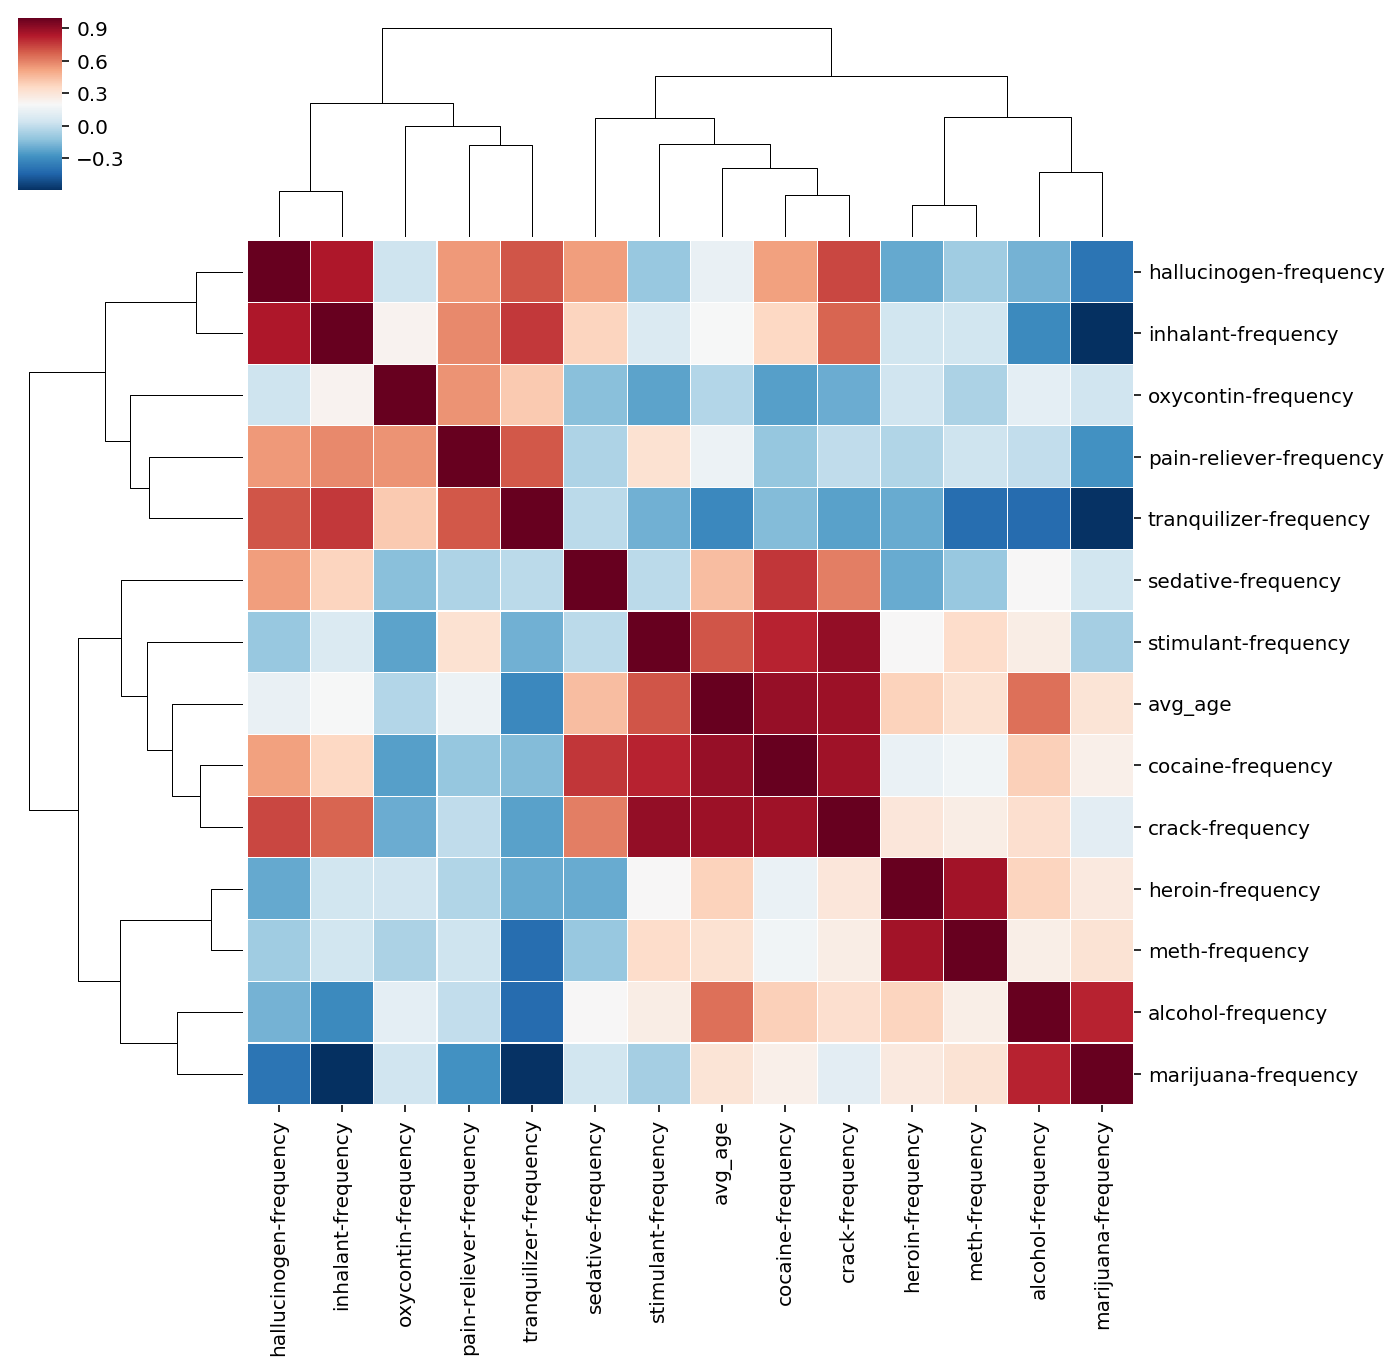

In [98]:
sns.clustermap((data_freq.drop('n',axis=1)).corr(), linewidths=0.1, cmap="RdBu_r")

__Analyse actual correlation values__

In [99]:
data_eda_corr = data_eda.corr()

# save into dataframe
corr_actual = pd.DataFrame(data_eda_corr.unstack())
corr_actual.reset_index(inplace=True)

# rename columns
corr_actual.columns = ['level_0', 'level_1', 'corr']

# create extra absolute column
corr_actual['corr_abs'] = corr_actual['corr'].abs()

# remove corr = 1
corr_actual = corr_actual[corr_actual['corr'] != 1]

In [100]:
corr_actual.sort_values('corr_abs', ascending=False).head(10)

,level_0,level_1,corr,corr_abs
437,pain-releiver-use,oxycontin-use,0.976445,0.976445
491,oxycontin-use,pain-releiver-use,0.976445,0.976445
479,oxycontin-use,marijuana-use,0.971733,0.971733
101,marijuana-use,oxycontin-use,0.971733,0.971733
105,marijuana-use,stimulant-use,0.968096,0.968096
591,stimulant-use,marijuana-use,0.968096,0.968096
99,marijuana-use,pain-releiver-use,0.966226,0.966226
423,pain-releiver-use,marijuana-use,0.966226,0.966226
441,pain-releiver-use,stimulant-use,0.961484,0.961484
603,stimulant-use,pain-releiver-use,0.961484,0.961484


__Certain frequencies and usage have fairly strong correlation:__

__- Pain reliever and Oxycontin use have a strong positive correlation (Oxycontin is a narcotic pain reliever). Corr: 0.976__

__- Marijuana and Stimulant use have a strong positive correlation (Marijuana acts as a stimulant). Corr: 0.968__

   Likely double reporting.

__- As Marijuana use increases, Oxycontin use increases. Corr: 0.971__

(Taking an oxycodone pill while smoking or ingesting marijuana will give the user a much more intense high. http://www.oxycodoneaddictionhelp.com/dangers-of-combining-marijuana-and-oxycodone)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**Question and deliverables**

Is there a difference in the usage of cocaine versus heroin?

__H_0:__ The difference between the mean of crack use and mean of heroin use is equal to 0.

__H_1:__ The difference between the mean of crack use and mean of heroin use is not equals to 0.

In [101]:
data_eda[['crack-use','heroin-use']].describe()

,crack-use,heroin-use
count,17.000000,17.000000
mean,0.294118,0.352941
std,0.235772,0.333762
min,0.000000,0.000000
25%,0.000000,0.100000
50%,0.400000,0.200000
75%,0.500000,0.600000
max,0.600000,1.100000


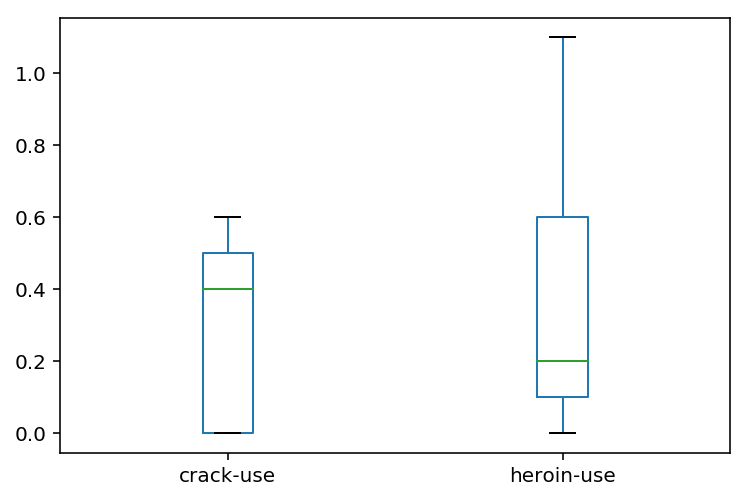

In [102]:
data_eda[['crack-use','heroin-use']].plot.box()

In [103]:
# 95% confidence level
alpha = 0.05

distri_1 = data_eda['crack-use'] - np.mean(data_eda['heroin-use'])
distri_2 = data_eda['heroin-use'] - np.mean(data_eda['heroin-use'])

results = stats.ttest_ind(distri_1, distri_2)

if results.pvalue < (alpha/2):
    print(f"""
    As p-value={results.pvalue} is less than {alpha/2}, we reject the null hypothesis and conclude that 
    the mean of crack use is not equal to the mean of heroin use.""")
else:
    print(f"""As p-value={results.pvalue} is greater than {alpha/2}, we do not reject the null hypothesis.""")

As p-value=0.5570045817367291 is greater than 0.025, we do not reject the null hypothesis.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [104]:
rate = df['Rate']

Outliers are datapoints that lie below (lower quartile - 1.5IQR), or above (upper quartile + 1.5 times).

In [105]:
lower_quartile = rate.quantile(0.25)
upper_quartile = rate.quantile(0.75)
IQR = upper_quartile - lower_quartile

print("Q1:", lower_quartile, "Q3:", upper_quartile, "IQR:", IQR)

Q1: 9.0 Q3: 64.0 IQR: 55.0


In [106]:
for value in rate:
    if value > (upper_quartile + 1.5*IQR):
        print(value)
    elif value < (lower_quartile - 1.5*IQR):
        print(value)
    else:
        pass

There are no outliers in this rate dataset.

If there were outliers and they were removed, the mean would be closer to the median, and the standard deviation would be lower. This is because the mean and standard deviation is greatly influenced by the magnitude of each point as opposed to the median which is less influenced.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [107]:
df[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


__A:__
The Pearson correlation measures the linear relationship between two continuous variables, while the spearman correlation is based on the ranked values of each variable rather than the raw data. 

To calculate the spearman rank correlation, first rank the values of each variable (rank 1 for the biggest value). Tied scores are given the mean of the tied ranks. Then, square the difference between the ranks of each variable and sum them. This is the numerator. The denominator is given by n(n^2 - 1) where n is the number of values. The spearman rank correlation is given by 1 - numerator/denominator.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [108]:
df['rate_percentile'] = df['Rate'].map(lambda x: stats.percentileofscore(df['Rate'], x))
df.head()

,State,Rate,Verbal,Math,Difference,rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863


In [109]:
df[df['State'] == 'CA']

,State,Rate,Verbal,Math,Difference,rate_percentile
23,CA,51,498,517,-19,55.882353


Percentile can give the ranking of the values in the variable.
Hence, it is possible to calculate the spearman rank correlation using the percentile.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

__A:__
Outliers can be defined as datapoints that lie below (lower quartile - 1.5IQR), or above (upper quartile + 1.5 times).

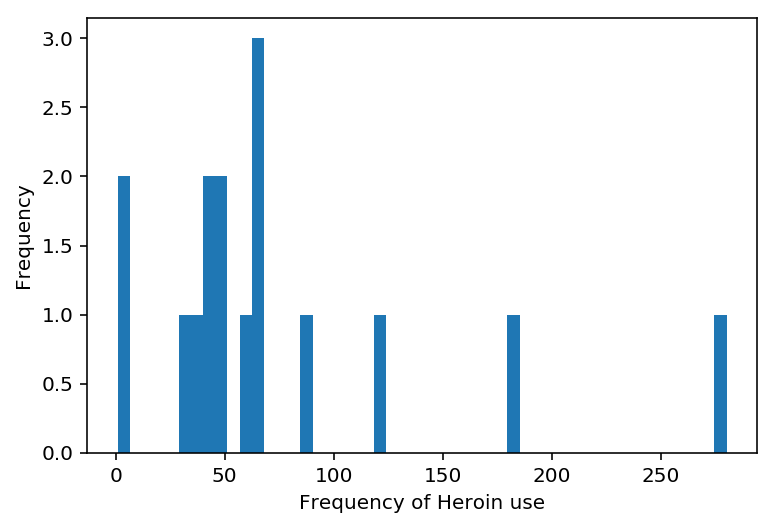

In [110]:
ax = data_eda['heroin-frequency'].dropna().plot.hist(bins=50)
ax.set_xlabel("Frequency of Heroin use")

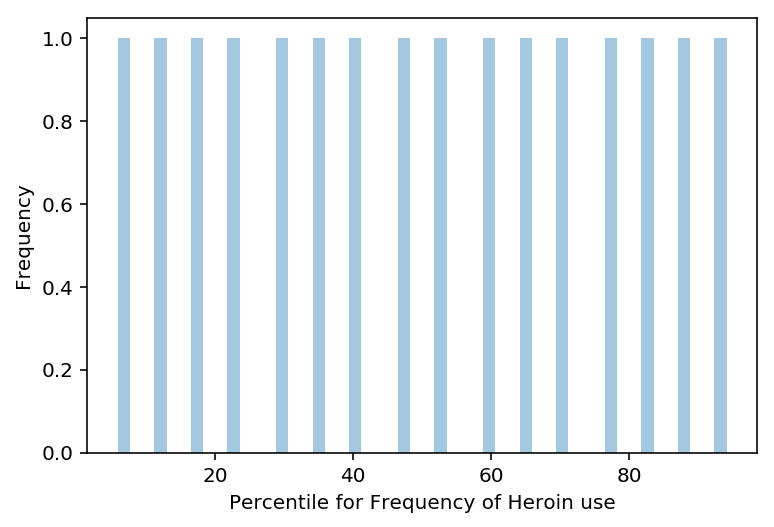

In [111]:
her_percentile = []
for n in data_eda['heroin-frequency'].dropna():
    her_percentile.append(stats.percentileofscore(data_eda['heroin-frequency'], n))

ax = sns.distplot(her_percentile, kde=False, bins=50)
ax.set_xlabel("Percentile for Frequency of Heroin use")
ax.set_ylabel("Frequency")

The scores become more evenly spaced out, across a maximum of 100.